In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import os
import math
import random
import re
import importlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('../data/text-1.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [3]:
import DataLoader
importlib.reload(DataLoader)

<module 'DataLoader' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\DataLoader.py'>

In [4]:
dataLoader = DataLoader.DataLoader(rawText=text)

In [5]:
import MLP
importlib.reload(MLP)

<module 'MLP' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\MLP.py'>

In [6]:
ctxLen = 10
model = MLP.MlpPredictor(
    numOfTokens=dataLoader.numOfTokens,
    ctxLen=ctxLen,
    embSize=32,
    char2int=dataLoader.char2int,
    int2char=dataLoader.int2char
)

In [7]:
import utils
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\utils.py'>

numOfParams=8,071,108


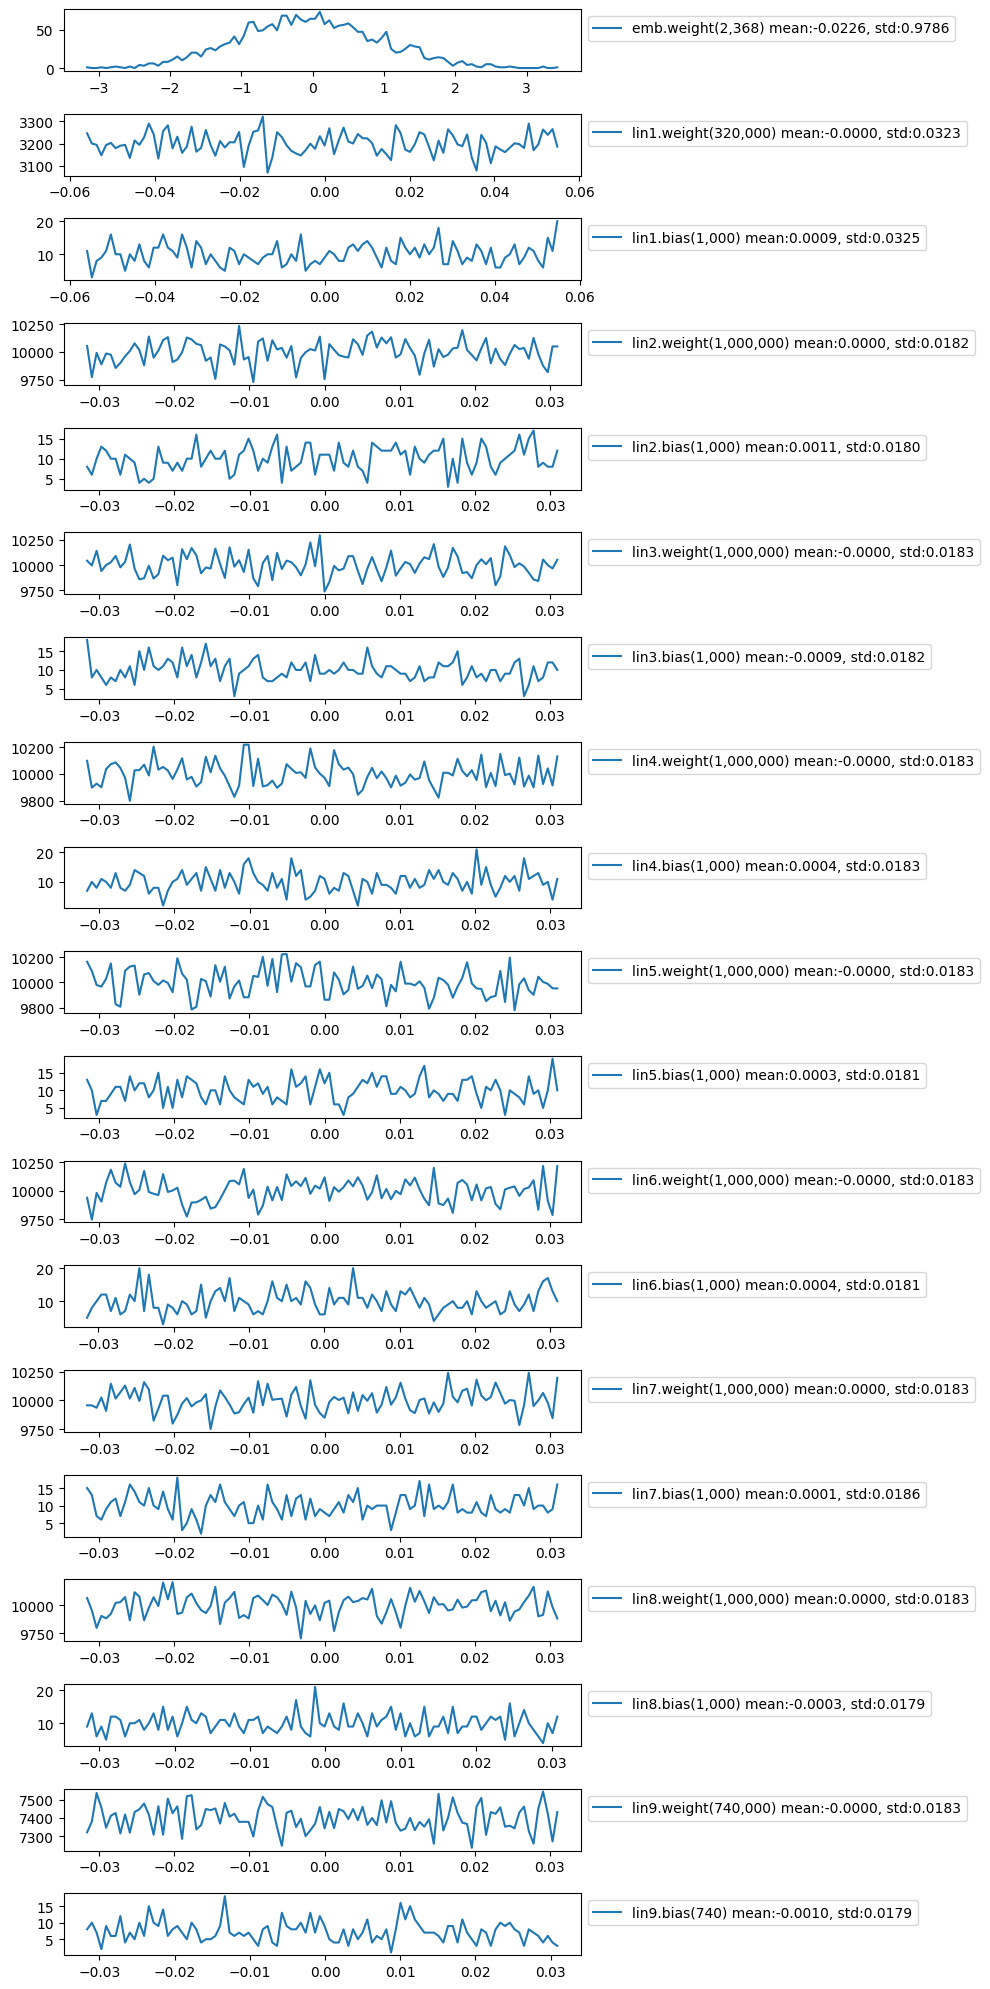

In [8]:
numOfParams = sum(p.numel() for p in model.parameters())
print(f'{numOfParams=:,}')
# showParamsStats(model, figsize=(10,20), layerNameFilter=re.compile('^lin.*weight$'))
utils.showParamsStats(model, figsize=(10,20))

In [13]:
model.generate('',100)

'haden y al thew morkssewome. want,tealeadet qtemofe.trwnchon impelt “nt  hanvts cii  tang efak is me'

In [10]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

In [79]:
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Igor\\igye\\projects\\python\\d2l2\\src\\utils.py'>

In [11]:
utils.trainLoop(
    epochNum=10,
    batchesPerEpoch=100,
    batchSize=32,
    model=model,
    optimizer=optimizer,
    dataLoader=dataLoader
)

epoch:0, trLoss=2.6311, valLoss=2.6775
epoch:1, trLoss=1.9355, valLoss=2.0710
epoch:2, trLoss=1.4949, valLoss=1.7002
epoch:3, trLoss=1.2341, valLoss=1.4158
epoch:4, trLoss=1.0010, valLoss=1.2933
epoch:5, trLoss=0.8305, valLoss=1.0707
epoch:6, trLoss=0.6995, valLoss=0.9450
epoch:7, trLoss=0.6247, valLoss=0.8510
epoch:8, trLoss=0.5289, valLoss=0.7599
epoch:9, trLoss=0.4645, valLoss=0.7120
